# 24. Bootstrapping Tools

In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

## Bootstrap Confidence Intervals

### Steps in bootstrapping

||Step|Example|
|---:|:---|:---
1.|Ask Question |What is the weight of babies born to smoking mothers?|
2.|Get sample data|Get weights of 100 babies born to smokers|
3.|Choose a statistic|Mean baby weight |
4.|If population data available, calculate the statistic of the original sample|The mean weight of the 100 babies is 114 oz.
5.|Bootstrap the sample and calculate the statistic on the bootstrap sample|The mean weight of the 100 babies in bootstrap sample 1 is 115.3 oz.
6.|Repeat over many bootstrapped samples and record the results| Usually 1k samples is more than enough.
7.|Plot the distrubution and observe the uncertainty inherent from samples of a given size|
8.|Find the 2.5 and 97.5 percentiles of the statistic over all of the bootstrap samples to compute a 95% confidence interval for the population parameter.



## Creating `boot_one` function to generate a single bootstrap sample

The function below will resample from the first column of a table. Ensure your data table has a numeric variables in its first column.

In [2]:
def boot_one(table, samp_size):
    resample = table.sample(samp_size)
    return np.average(resample.column(0))

Let's see how it works by loading sample data. Let's resample the 'Perfectionism' variable.

In [3]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.show(5)

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8


We will feed the function a one-column table with the perfectionism scores. The function will resample (n = 25) and return the mean of that sample. Re-execute the code block several times to see what typical values in the distribution look like.

In [4]:
boot_one(pers.select('Perf'),25)

115.24

### Step 1. Ask Question

What is the mean weight of babies born to smokers?

````{margin}
```{tip}
We can estimate parameters other than the mean. In fact, bootstrapping is more flexible than traditional methods estimating parameters like the median or the first quartile.
```
````

### Step 2. Get Sample Data

Read in the Data.  The data might be population data or sample data. Be aware of the diiference. If the data is population data, you will need to first create a sample from the population data, then resample it.

In [5]:
# This is sample data
births = Table.read_table('http://faculty.ung.edu/rsinn/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


### Step 3. Choose a statistic (mean)

The default statistic is the mean. If we want to estimate a different statistic like the median, then we would need to take the function `boot_one` and replace the `np.average` with `np.median`. In almost every case, especially in an introductory statistics course, we will estimate the mean.

Select the the birth weight of babies born to smokers as a one-column table of numeric values.

In [6]:
smoked = births.where('Maternal Smoker',True).select('Birth Weight')
smoked.show(5)

Birth Weight
128
108
143
144
141


### Step 4. Calculate the statistic of the original sample

Our original data is a sample, not a population, so every time we sample that sample we are *resampling* which is another name for bootstrapping.

### Step 5. Bootstrap the sample and calculate the statistic on the bootstrap sample

Choose a resample size and sample **with** replacement.

In [7]:
boot_one(smoked,100)

113.46

### Step 6. Repeat over many bootstrap samples

We use our standard `for` loop setup with a blank results array and `np.append` to add new results to it. Our resample size is 50, but we need 500 - 1,000 resamples for an accurate bootstrap distribution.

In [8]:
boot_samp = make_array()
resamp_size = 50

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(smoked,resamp_size)
    boot_samp = np.append(boot_samp, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
#boot_samp

In [9]:
def boot_hist (array):
    left = round(percentile(2.5, array),2)
    right = round(percentile(97.5, array),2)
    avg = round(np.average(array),2)
    tab = Table().with_column('Bootstrapped Sample',array)
    tab.hist(0)
    _ = plots.title('95% Confidence Interval')
    _ = plots.plot([left, left], [0, 0.1], color='red', lw=2)
    _ = plots.plot([right, right], [0, 0.1], color='red', lw=2)
    _ = plots.scatter(avg, 0, color="gold", s = 200,zorder=2);
    print("The 95% confidence interval lies between ", left," and ", right, ",")
    print("and the gold dot at x = ", avg, " is the mean of the bootstrapped sample distribution.")

The 95% confidence interval lies between  108.3  and  118.88 ,
and the gold dot at x =  113.91  is the mean of the bootstrapped sample distribution.


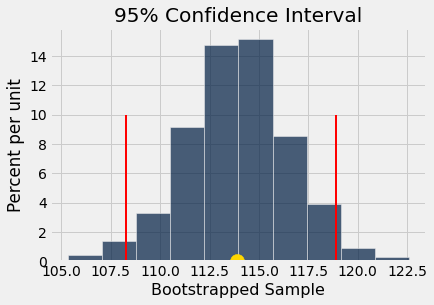

In [10]:
boot_hist(boot_samp)

The 95% confidence interval endpoints are shown above the histogram: we are 95% confident that the true mean lies between 108.9 and 118.8.

## Compare to resamples of size 200

Note that this resample size is 4 times larger than we used above. The law of large numbers indicates this larger (re)sample size should lead to a more accurate estimate.

In [11]:
boot_samp_2 = make_array()
resamp_size = 200

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(smoked,resamp_size)
    boot_samp_2 = np.append(boot_samp_2, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
#boot_samp

The 95% confidence interval lies between  111.38  and  116.1 ,
and the gold dot at x =  113.86  is the mean of the bootstrapped sample distribution.


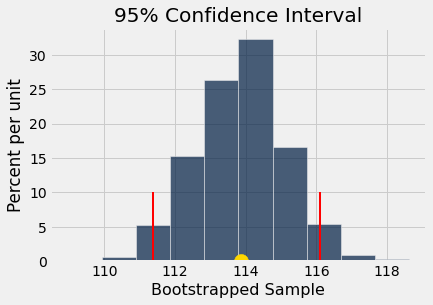

In [12]:
boot_hist(boot_samp_2)

Compared to the confidence interval generated with a resample size of $n=50$, the width of the new confidence interval is approximately 5 units less.